# Algorithmic Whales Portfolio Construction and Evaluation
Evaluate Whales and Algo Portfolios Relative to the S&P 500

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
#!pip install iexfinance
import iexfinance as iex

%matplotlib inline

In [6]:
import datetime as dt
from iexfinance.stocks import get_historical_data
import pandas_datareader.data as web
from pathlib import Path
filepath = Path("path/to/file")

## Read in And Filter/Arrange Whale Data

In [107]:
#Reading whale returns from our csv file
whale_returns=pd.read_csv(
    '/Users/cyb/Dropbox/Trilogy/GitCode/FinTech-Lesson-Plans/02-Homework/04-Pandas/Solutions/whale_returns.csv',
        index_col='date', infer_datetime_format=True, parse_dates=True)


In [108]:
#Viewing the 5 most recent days of data
whale_returns.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223
2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702
2019-05-01,-0.005847,-0.001341,-0.007936,-0.007833


## Read in And Filter/Arrange Algo Returns 

In [425]:
algo_returns=pd.read_csv(
    '/Users/cyb/Dropbox/Trilogy/GitCode/FinTech-Lesson-Plans/02-Homework/04-Pandas/Solutions/algo_returns.csv', 
        index_col=['Date'])
algo_returns.index=pd.to_datetime(algo_cumulative_returns.index, infer_datetime_format=True)
algo_returns.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


## Combine Whale and Algo Returns 

In [426]:
#Construct a new dataframe, first populate it with the whale returns.
all_portfolios=whale_returns.copy()
#Then add the algo portfolio returns.
all_portfolios['Algo Portfolio 1']=algo_returns['Algo 1']
all_portfolios['Algo Portfolio 2']=algo_returns['Algo 2']
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo Portfolio 1,Algo Portfolio 2
date,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155
2015-03-11,0.004012,0.005163,0.003312,-0.001147,0.002994,0.000605
2015-03-12,0.008265,0.010272,0.013117,0.010801,-0.002935,0.011667


### Plot Returns and Cumulative Returns 

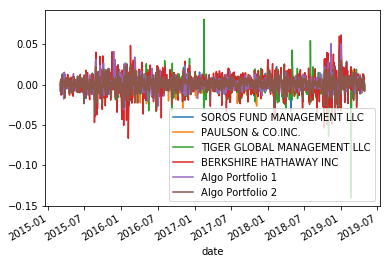

In [428]:
all_portfolios.plot()

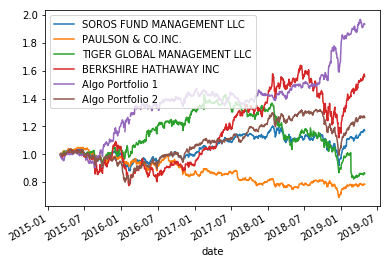

In [429]:
(1+all_portfolios).cumprod().plot()



## Read in S&P 500 Data and Compare Performance

In [430]:

#Read in daily S&P 500 closing prices.
sp500=pd.read_csv('/Users/cyb/Dropbox/Trilogy/GitCode/FinTech-Lesson-Plans/02-Homework/04-Pandas/Solutions/SP500_Price_History.csv')
#Rename the columns
sp500.columns=['Date', 'SP500 Price']
#Set a datetime index (inferring format)
sp500=sp500.set_index(pd.to_datetime(sp500['Date'], infer_datetime_format=True))
#We set the 'Date' column as a datetime index; no we don't need it as a column as well
del(sp500['Date'])
sp500.sort_index(inplace=True)
sp500.head()

,SP500 Price
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [431]:
print('Daily Standard Deviation, ', 'S&P 500:', sp500.pct_change(1).std()  )
#Annual Standard Deviation 
#(There are 252 trading days in a U.S. Calendar year)
print('Annual Standard Deviation, ', 'S&P 500:', sp500.pct_change(1).std()*np.sqrt(252)  )

Daily Standard Deviation,  S&P 500: SP500 Price    0.008111
dtype: float64
Annual Standard Deviation,  S&P 500: SP500 Price    0.128762
dtype: float64


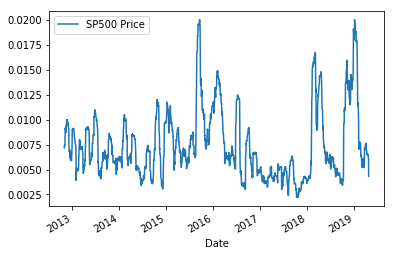

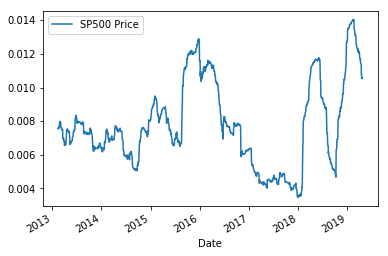

In [432]:
#21-day rolling window of data to use to calculate std
#This is a 'Moving Average Window'.
sp500.pct_change(1).rolling(21).std().plot()

#How does the volatility of the S&P 500 change when we increase the amount of data?
#(i.e., we increase the length of time we look back into?)
sp500.pct_change(1).rolling(90).std().plot()

In [433]:
#Annualized Returns
(sp500.pct_change(1)*252).head()

,SP500 Price
Date,
2012-10-01,NaN
2012-10-02,0.219815
2012-10-03,0.913353
2012-10-04,1.807952
2012-10-05,-0.081046


In [434]:
#Average Returns of the S&P 500 

#To construct average monthly returns for the S&P, we need the first and last price of the month. 
#Then we calculate monthly prices by using the formula P2/P1-1 , where P2 is the price at the end of the month.
#This is equivalent to pct_change(), or (P2-P1)/P1

first_of_month_ret=sp500.groupby([(sp500.index.year), (sp500.index.month)]).first()
last_of_month_ret=sp500.groupby([(sp500.index.year), (sp500.index.month)]).last()

monthly_returns=(last_of_month_ret/first_of_month_ret-1)
monthly_returns.index.names = ['Year', 'Month']
monthly_returns.head()

SP500 Price
Year Month             
2012 10       -0.022382
     11       -0.007992
     12        0.011870
2013 1         0.024405
     2         0.000998

In [435]:
#Determining daily returns
daily_returns_sp500 = sp500.pct_change()
print(daily_returns_sp500.mean())
daily_returns_sp500.head()

SP500 Price    0.000463
dtype: float64


,SP500 Price
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [436]:
#Annual Sharpe
sharpe_ratios=( (daily_returns_sp500.mean()*252)
        / (daily_returns_sp500.std()*np.sqrt(252))   )
sharpe_ratios

SP500 Price    0.906028
dtype: float64

## Compare Portfolio Performance to the S&P 500 

In [437]:
#Returns Cumulative and Plot

all_portfolios['S&P 500']=daily_returns_sp500
all_portfolios.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo Portfolio 1,Algo Portfolio 2,S&P 500
date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


In [438]:
all_portfolios.dropna(inplace=True)

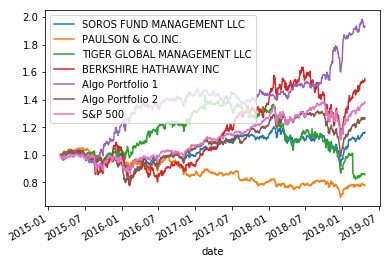

In [439]:

cumulative_returns=(1+all_portfolios).cumprod()
cumulative_returns.plot()

In [440]:
#Daily Standard Deviations
all_portfolios.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo Portfolio 1               0.007620
Algo Portfolio 2               0.008342
S&P 500                        0.008554
dtype: float64

In [441]:
#Annual Standard Deviation 
#(There are 252 trading days in a U.S. Calendar year)
print('Annualized Standard Deviations: \n', all_portfolios.std()*np.sqrt(252)  )

Annualized Standard Deviations: 
 SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo Portfolio 1               0.120967
Algo Portfolio 2               0.132430
S&P 500                        0.135786
dtype: float64


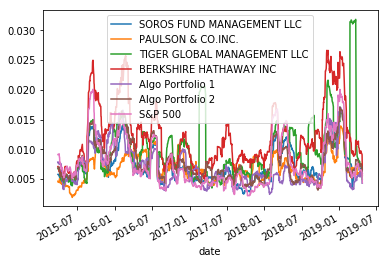

In [442]:
#Rolling Standard Deviations and Correlation

#21-day rolling window of data to use to calculate std
#This is a 'Moving Average Window'.
all_portfolios.rolling(21).std().plot()

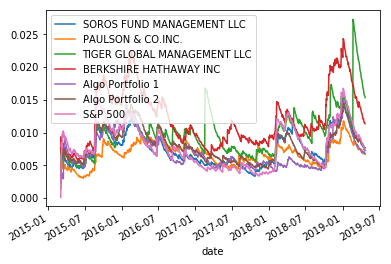

In [443]:
#An alternative way to calculate a rolling window is 
#via an 'exponentially weighted moving average'. This is 
#like a moving window average, but it assigns greater importance
#to more recent observations.
all_portfolios.ewm(halflife=21).std().plot()

In [444]:
#Portfolio Correlations
correlations=all_portfolios.corr()
correlations

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo Portfolio 1,Algo Portfolio 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo Portfolio 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo Portfolio 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [445]:
all_portfolios.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo Portfolio 1,Algo Portfolio 2,S&P 500
date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


Rolling beta between  BERKSHIRE HATHAWAY INC  and the S&P 500


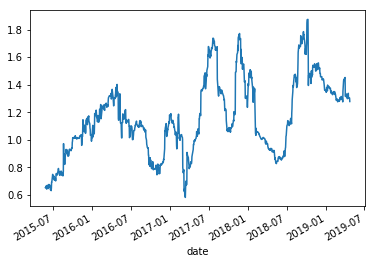

In [446]:
#Rolling Beta of column[i] and the S&P 500
column=3
covariance=all_portfolios.iloc[:,column].rolling(window=60).cov(all_portfolios['S&P 500'])
variance=all_portfolios['S&P 500'].rolling(window=60).var()
(covariance/variance).dropna().plot()
print('Rolling beta between ', all_portfolios.columns[column], ' and the S&P 500' )

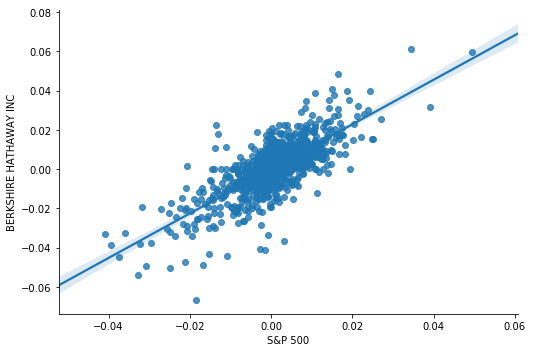

In [447]:
#Beta and correlation, plotted together

#The shape of the scatter is correlation
# (the more 'tightly knit' together across a direction, the stronger the correlation)
# (the stronger the correlation, the stronger and more consistent the relation between the two)

#The slope of that best-fitting line represents beta 
#This is our average predictive relationship between the two 
#(e.g, if X goes up by 2, best bet is that Y goes up by 2*beta)

import seaborn as sns
sns.lmplot(x='S&P 500', y='BERKSHIRE HATHAWAY INC', data=all_portfolios,aspect=1.5, fit_reg=True)


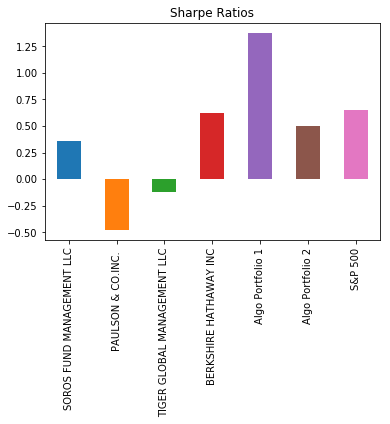

In [448]:
#Sharpe Ratio
sharpe_ratios=( (all_portfolios.mean()*252)
        / (all_portfolios.std()*np.sqrt(252))   )
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

In [449]:
#Plot Monthly, Annual Total, Returns and show the resulting data (in dataframe)
first_of_month_ret=cumulative_returns.groupby([(cumulative_returns.index.year), (cumulative_returns.index.month)]).first()
last_of_month_ret=cumulative_returns.groupby([(cumulative_returns.index.year), (cumulative_returns.index.month)]).last()

monthly_returns=(last_of_month_ret/first_of_month_ret-1)

monthly_returns.index.names = ['Year', 'Month']
monthly_returns.head()

first_of_year_ret=cumulative_returns.groupby([(cumulative_returns.index.year)]).first()
last_of_year_ret=cumulative_returns.groupby([(cumulative_returns.index.year)]).last()

annual_returns=(last_of_year_ret/first_of_year_ret-1)
annual_returns.index.names = ['Year']
annual_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo Portfolio 1,Algo Portfolio 2,S&P 500
Year,,,,,,,
2015,-0.001755,-0.018798,0.028154,0.041279,0.235785,-0.064872,-0.030288
2016,0.006357,-0.113786,0.285932,-0.074570,0.169710,0.130114,0.112374
2017,0.139174,-0.083763,-0.004449,0.479395,-0.010532,0.151736,0.184150
2018,-0.155639,-0.124487,-0.314504,-0.154322,0.164383,-0.155967,-0.070094
2019,0.193057,0.079941,-0.046011,0.306086,0.099010,0.200527,0.168783


##### Challenge Section: Build your own portfolio algorithm

Can you use IEX to construct and use a quantitative algorithm yourself?

In [22]:
#First, we need to get a list of potential stocks we can get from iex:
#Returns array of all symbols that IEX Cloud supports for API calls
tickers=pd.DataFrame(iex.refdata.get_symbols())  
tickers.head()
#Of these, we'll just want to look at stocks ('common stock', or 'cs') for now:
print(tickers[tickers['type']=='cs'].shape)  #How many different stocks can we call data for? (# of rows)
tickers=tickers[tickers['type']=='cs']
tickers=list(tickers['symbol'].drop_duplicates())


(5437, 6)


In [37]:


start = dt.datetime(2014, 1, 1)
end = dt.datetime(2019, 5, 1)  #Year, month, day


#Pull equity price data for all tickers any whale has ever held
#IEX imposes pacing limitations; only 100 can be pulled at a time:
for i in range(0,len(tickers[0:2000]), 5):
#     print(i)
    if i==0:
        df = get_historical_data(tickers[i:i+5], start, end,  output_format='pandas')
    #Let's pull daily price data for our list of tickers over a particular period of time:
    else:
        try:
            tempdf = get_historical_data(tickers[i:i+5], start, end,  output_format='pandas')
            df=pd.concat([df, tempdf], axis=1)
        except:
            pass
        
df.head()
#We have a little cleaning to do. 
#Let's cut it down to just the 'closing price' column, 'close', where the cut is across columns (axis=1), and
#we're pulling from the second level of columns, where 'close' is located (level=1)
closing_prices=df.xs( level=1, axis=1, key='close')
closing_prices.head(20)
#Since we rebalance our portfolio weekly:
#Construct Weekly Returns


,A,AA,AABA,AAC,AAL,AAMC,AAME,AAN,AAOI,AAON,...,FTR,FTS,FTSI,FTSV,FTV,FUL,FULT,FUN,FUNC,FUND
date,,,,,,,,,,,,,,,,,,,,,
2014-05-09,37.7227,NaN,33.76,NaN,36.4477,742.00,3.3849,31.6652,17.57,19.6925,...,63.3398,24.4208,NaN,NaN,NaN,44.9244,10.2539,38.5609,8.2954,5.5343
2014-05-12,38.4174,NaN,34.45,NaN,37.5241,827.05,3.3849,32.7774,17.44,20.4546,...,63.1307,24.6097,NaN,NaN,NaN,45.8558,10.4277,38.5380,8.1881,5.6035
2014-05-13,38.7034,NaN,34.40,NaN,37.4479,822.05,3.3849,32.2164,17.26,19.8847,...,63.0262,24.4865,NaN,NaN,NaN,45.1502,10.3234,38.4085,8.3247,5.5758
2014-05-14,38.0360,NaN,34.17,NaN,37.0002,819.25,3.3462,31.9703,17.22,19.2827,...,62.9217,24.6651,NaN,NaN,NaN,44.7550,10.1322,38.0655,8.2271,5.5274
2014-05-15,37.1098,NaN,33.80,NaN,36.3810,805.00,3.4430,31.7144,18.15,19.1354,...,62.0855,24.5631,NaN,NaN,NaN,44.1059,10.0366,38.0655,8.2466,5.5413
2014-05-16,37.4775,NaN,33.41,NaN,36.7001,841.00,3.2592,31.8817,18.15,19.3915,...,61.6674,24.5631,NaN,NaN,NaN,44.5104,10.0366,38.0960,8.1881,5.5482
2014-05-19,37.4367,NaN,33.89,NaN,36.7430,860.80,3.3656,31.6061,19.28,19.5164,...,62.1901,24.6998,NaN,NaN,NaN,44.7833,10.3234,37.9893,8.1783,5.5482
2014-05-20,36.9872,NaN,33.87,NaN,36.4286,884.97,3.3849,31.4486,18.15,18.7960,...,61.1448,24.6516,NaN,NaN,NaN,43.6166,10.1583,37.8826,8.2661,5.5343
2014-05-21,37.4503,NaN,34.36,NaN,36.5048,896.05,3.3656,31.9408,18.35,19.2827,...,58.5318,24.6704,NaN,NaN,NaN,43.7013,10.2452,38.4771,8.2564,5.5620


In [38]:
closing_prices

,A,AA,AABA,AAC,AAL,AAMC,AAME,AAN,AAOI,AAON,...,FTR,FTS,FTSI,FTSV,FTV,FUL,FULT,FUN,FUNC,FUND
date,,,,,,,,,,,,,,,,,,,,,
2014-05-09,37.7227,NaN,33.76,NaN,36.4477,742.0000,3.3849,31.6652,17.57,19.6925,...,63.3398,24.4208,NaN,NaN,NaN,44.9244,10.2539,38.5609,8.2954,5.5343
2014-05-12,38.4174,NaN,34.45,NaN,37.5241,827.0500,3.3849,32.7774,17.44,20.4546,...,63.1307,24.6097,NaN,NaN,NaN,45.8558,10.4277,38.5380,8.1881,5.6035
2014-05-13,38.7034,NaN,34.40,NaN,37.4479,822.0500,3.3849,32.2164,17.26,19.8847,...,63.0262,24.4865,NaN,NaN,NaN,45.1502,10.3234,38.4085,8.3247,5.5758
2014-05-14,38.0360,NaN,34.17,NaN,37.0002,819.2500,3.3462,31.9703,17.22,19.2827,...,62.9217,24.6651,NaN,NaN,NaN,44.7550,10.1322,38.0655,8.2271,5.5274
2014-05-15,37.1098,NaN,33.80,NaN,36.3810,805.0000,3.4430,31.7144,18.15,19.1354,...,62.0855,24.5631,NaN,NaN,NaN,44.1059,10.0366,38.0655,8.2466,5.5413
2014-05-16,37.4775,NaN,33.41,NaN,36.7001,841.0000,3.2592,31.8817,18.15,19.3915,...,61.6674,24.5631,NaN,NaN,NaN,44.5104,10.0366,38.0960,8.1881,5.5482
2014-05-19,37.4367,NaN,33.89,NaN,36.7430,860.8000,3.3656,31.6061,19.28,19.5164,...,62.1901,24.6998,NaN,NaN,NaN,44.7833,10.3234,37.9893,8.1783,5.5482
2014-05-20,36.9872,NaN,33.87,NaN,36.4286,884.9700,3.3849,31.4486,18.15,18.7960,...,61.1448,24.6516,NaN,NaN,NaN,43.6166,10.1583,37.8826,8.2661,5.5343
2014-05-21,37.4503,NaN,34.36,NaN,36.5048,896.0500,3.3656,31.9408,18.35,19.2827,...,58.5318,24.6704,NaN,NaN,NaN,43.7013,10.2452,38.4771,8.2564,5.5620


In [82]:
#lookback returns

#IMPORTANT: We're using only *Past* information to build this strategy! Otherwise it would not be realistic.
lookback_window=10    
lookback_returns = (closing_prices.shift(2) / closing_prices.shift(2+lookback_window) )-1


lookback_returns

,A,AA,AABA,AAC,AAL,AAMC,AAME,AAN,AAOI,AAON,...,FTR,FTS,FTSI,FTSV,FTV,FUL,FULT,FUN,FUNC,FUND
date,,,,,,,,,,,,,,,,,,,,,
2014-05-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
returns=closing_prices.pct_change()
returns.tail()

,A,AA,AABA,AAC,AAL,AAMC,AAME,AAN,AAOI,AAON,...,FTR,FTS,FTSI,FTSV,FTV,FUL,FULT,FUN,FUNC,FUND
date,,,,,,,,,,,,,,,,,,,,,
2019-04-25,0.012271,-0.035917,0.014053,0.019481,-0.017066,-0.049812,0.023786,0.108504,-0.028951,-0.009760,...,0.012000,0.004095,-0.009407,0.044036,-0.014260,-0.045646,-0.000589,-0.004088,-0.013845,-0.002813
2019-04-26,0.009124,-0.007377,-0.004837,0.044586,-0.010473,-0.061041,0.000000,-0.033700,0.013699,0.022177,...,0.043478,-0.000272,0.021842,0.002670,-0.029160,0.027271,0.011786,0.000187,0.021598,-0.005642
2019-04-29,-0.001162,-0.002230,-0.001708,0.048780,0.021474,0.077438,-0.050044,-0.012268,-0.011129,0.006227,...,0.026515,-0.003264,-0.001859,0.023962,0.007274,0.001634,0.009319,0.005223,0.003700,-0.004255
2019-04-30,0.015130,-0.006331,-0.007896,-0.063953,0.012140,-0.041704,0.040917,-0.011888,0.006431,0.002396,...,0.051661,0.009550,-0.036313,-0.012480,0.005708,-0.001631,-0.004616,0.001485,-0.003686,-0.001425
2019-05-01,-0.013121,-0.025487,0.019233,0.012422,-0.007899,0.008148,0.000000,-0.019034,-0.019968,-0.006772,...,-0.224561,-0.010270,-0.009662,-0.038968,-0.011119,-0.032877,-0.015652,0.003520,-0.006342,-0.002853


In [78]:
#Group firms into portfolios, by first grouping them into 'buckets':

#First, specify the amount of bins
bin_num=5
#Remove those with more than [thresh] total missing values
lookback_returns.dropna(axis=0, thresh=75, inplace=True)
lookback_returns
# #Apply, within each date (i.e., across all the columns (axis=1) ), the qcut function.
# #Qcut sorts these stocks into bins--5 exhibiting the most positive values (in this case high momentum)
# #and bin 1 exhibiting the most negative values (in this case negative momentum)
# #the 'labels' argument is to ascribe a customized name to each bin (in this case we're just using 1 through 10)
rankings_df=lookback_returns.apply(
    lambda x: pd.qcut(x, bin_num, labels=list(range(1,bin_num+1)), duplicates='drop', retbins=False),
    axis=1)
rankings_df.tail()


,A,AA,AABA,AAC,AAL,AAMC,AAME,AAN,AAOI,AAON,...,FTR,FTS,FTSI,FTSV,FTV,FUL,FULT,FUN,FUNC,FUND
date,,,,,,,,,,,,,,,,,,,,,
2019-04-25,1.0,2.0,4.0,1.0,3.0,1.0,5.0,2.0,3.0,5.0,...,5.0,3.0,5.0,5.0,4.0,2.0,5.0,4.0,5.0,3.0
2019-04-26,1.0,2.0,3.0,1.0,4.0,2.0,4.0,3.0,5.0,5.0,...,5.0,2.0,2.0,3.0,4.0,3.0,5.0,4.0,5.0,3.0
2019-04-29,1.0,1.0,4.0,1.0,2.0,1.0,3.0,5.0,4.0,5.0,...,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,4.0
2019-04-30,1.0,1.0,4.0,1.0,1.0,NaN,4.0,5.0,4.0,5.0,...,5.0,2.0,3.0,5.0,2.0,2.0,5.0,3.0,5.0,3.0
2019-05-01,1.0,1.0,2.0,1.0,2.0,1.0,4.0,5.0,1.0,5.0,...,5.0,2.0,2.0,4.0,2.0,2.0,5.0,4.0,5.0,2.0


In [70]:
#Next, apply the ranking information to the dataframe of weekly stock returns
long_form=pd.DataFrame(returns.stack(), columns=['Returns'])
long_form.head()
#Here, we add a 'rankings' column
long_form['Rankings']=pd.DataFrame(rankings_df.stack(), columns=['Rankings'])
long_form.index.names=['Date', 'Ticker']
long_form.tail()



Returns  Rankings
Date       Ticker                    
2019-05-01 FUL    -0.032877       2.0
           FULT   -0.015652       5.0
           FUN     0.003520       4.0
           FUNC   -0.006342       5.0
           FUND   -0.002853       2.0

In [71]:
#Convert Portfolio Returns to Cumulative Returns and Plot

In [170]:
portfolio_returns=long_form.reset_index(level=[0,1]).groupby(['Date', 'Rankings']).mean()
portfolio_returns.tail()

Returns
Date       Rankings          
2019-05-01 1.0      -0.008589
           2.0      -0.007271
           3.0      -0.004057
           4.0      -0.005816
           5.0      -0.008682

In [171]:
portfolio_returns=portfolio_returns.unstack()
portfolio_returns.columns=portfolio_returns.columns.droplevel(0)
portfolio_returns.head()

Rankings,1.0,2.0,3.0,4.0,5.0
Date,,,,,
2014-05-28,0.001475,-0.002672,-0.001334,-0.000552,-0.000269
2014-05-29,0.006847,0.003872,0.004589,0.003874,0.002869
2014-05-30,-0.001892,-0.000366,-0.000409,-0.000536,-0.006356
2014-06-02,-0.001615,-0.002432,-0.000734,-0.001760,-0.007307
2014-06-03,0.001608,-0.001074,-0.002002,-0.001435,-0.003685


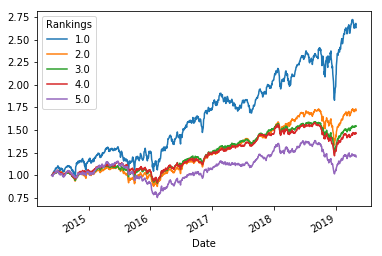

In [175]:
#Cumulating weekly returns 
cumulative_returns = (1+portfolio_returns).cumprod()
cumulative_returns.plot()

In [368]:
algo_returns=pd.DataFrame((portfolio_returns[1.0]-portfolio_returns[5.0]), columns=['Algo 1'])
algo_returns.tail()

,Algo 1
Date,
2019-04-25,0.000682
2019-04-26,0.002981
2019-04-29,0.005208
2019-04-30,-0.002944
2019-05-01,0.000094


In [ ]:
#Relative Strength Index - An alternative algorithmic strategy
#This wasn't introduced during the week... but here for your edification! 

In [386]:
# Relative Strength Index
def RSIndex(price,n=14):
    """
    Relative strength index function
    Takes in the time series data frame, which needs a "Close" column
    Default number of periods is 14
    """
    #get price difference
    delta = price.diff()
    
    #if price difference is <0, set dUP to 0 and vice versa.
    dUp, dDown = delta.copy(), delta.copy()
    dUp[dUp < 0] = 0
    dDown[dDown > 0] = 0

    #use rolling mean to get average mean
    RollUp = dUp.rolling(window=n,center=False).mean()
    RollDown = dDown.rolling(window=n,center=False).mean().abs()
    
    #calculate RSI
    RS = RollUp/RollDown
    rsi = 100.0 - (100.0 / (1+ RS))
    return rsi

In [387]:

def GroupFirms(dataframe, bin_nums=5):
    #Group firms into portfolios, by first grouping them into 'buckets':
    #First, specify the amount of bins
    bin_num=bin_nums
    lookback_returns=dataframe.copy()
    #Remove those with more than [thresh] total missing values
    lookback_returns=lookback_returns.dropna(axis=0, thresh=75)
    lookback_returns
    # #Apply, within each date (i.e., across all the columns (axis=1) ), the qcut function.
    # #Qcut sorts these stocks into bins--5 exhibiting the most positive values (in this case high momentum)
    # #and bin 1 exhibiting the most negative values (in this case negative momentum)
    # #the 'labels' argument is to ascribe a customized name to each bin (in this case we're just using 1 through 10)
    rankings_df=lookback_returns.apply(
        lambda x: pd.qcut(x, bin_num, labels=list(range(1,bin_num+1)), duplicates='drop', retbins=False),
        axis=1)
    return rankings_df

def CalculatePortfolioReturns(returns_dataframe, ranking_df):
    returns=returns_dataframe
    rankings_df=ranking_df
    #Next, apply the ranking information to the dataframe of weekly stock returns
    long_form=pd.DataFrame(returns.stack(), columns=['Returns'])
    long_form.head()
    #Here, we add a 'rankings' column
    long_form['Rankings']=pd.DataFrame(rankings_df.stack(), columns=['Rankings'])
    long_form.index.names=['Date', 'Ticker']
    long_form.tail()

    portfolio_returns=long_form.reset_index(level=[0,1]).groupby(['Date', 'Rankings']).mean()
    portfolio_returns.tail()

    portfolio_returns=portfolio_returns.unstack()
    portfolio_returns.columns=portfolio_returns.columns.droplevel(0)
    portfolio_returns.head()

    #Cumulating weekly returns 
    cumulative_returns = (1+portfolio_returns).cumprod()
    cumulative_returns.plot()
    return portfolio_returns, cumulative_returns

In [388]:
rsi=RSIndex(closing_prices)

In [389]:
rsi=GroupFirms(rsi.iloc[15:,:])

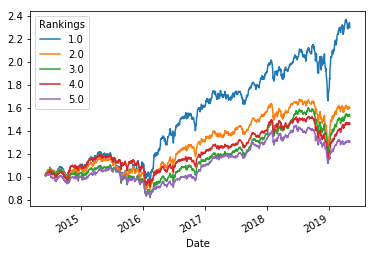

In [396]:
(rsi_ret, rsi_cum_ret)=CalculatePortfolioReturns(closing_prices.pct_change() , rsi.shift(3))

In [415]:
rsi_ret[4.0].head()


Date
2014-06-05    0.013285
2014-06-06    0.008284
2014-06-09    0.005668
2014-06-10   -0.000735
2014-06-11   -0.003761
Name: 4.0, dtype: float64

In [421]:
algo_returns['Algo 2']=rsi_ret[4.0]
algo_returns.tail()

,Algo 1,Algo 2
Date,,
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829
2019-04-30,-0.002944,-0.001570
2019-05-01,0.000094,-0.007358


In [422]:
(algo_returns).to_csv(
    '/Users/cyb/Dropbox/Trilogy/GitCode/FinTech-Lesson-Plans/02-Homework/04-Pandas/Solutions/algo_returns.csv')